In [100]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [101]:
df = pd.read_csv('./fcc-forum-pageviews.csv')

In [102]:
df.head()

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933


# Filtering the data


In [103]:
df["date"] = pd.to_datetime(df["date"])
df = df.set_index('date')

# Clean data
df = df.loc[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]

In [104]:
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


<Axes: title={'center': 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019'}, xlabel='Date', ylabel='Page Views'>

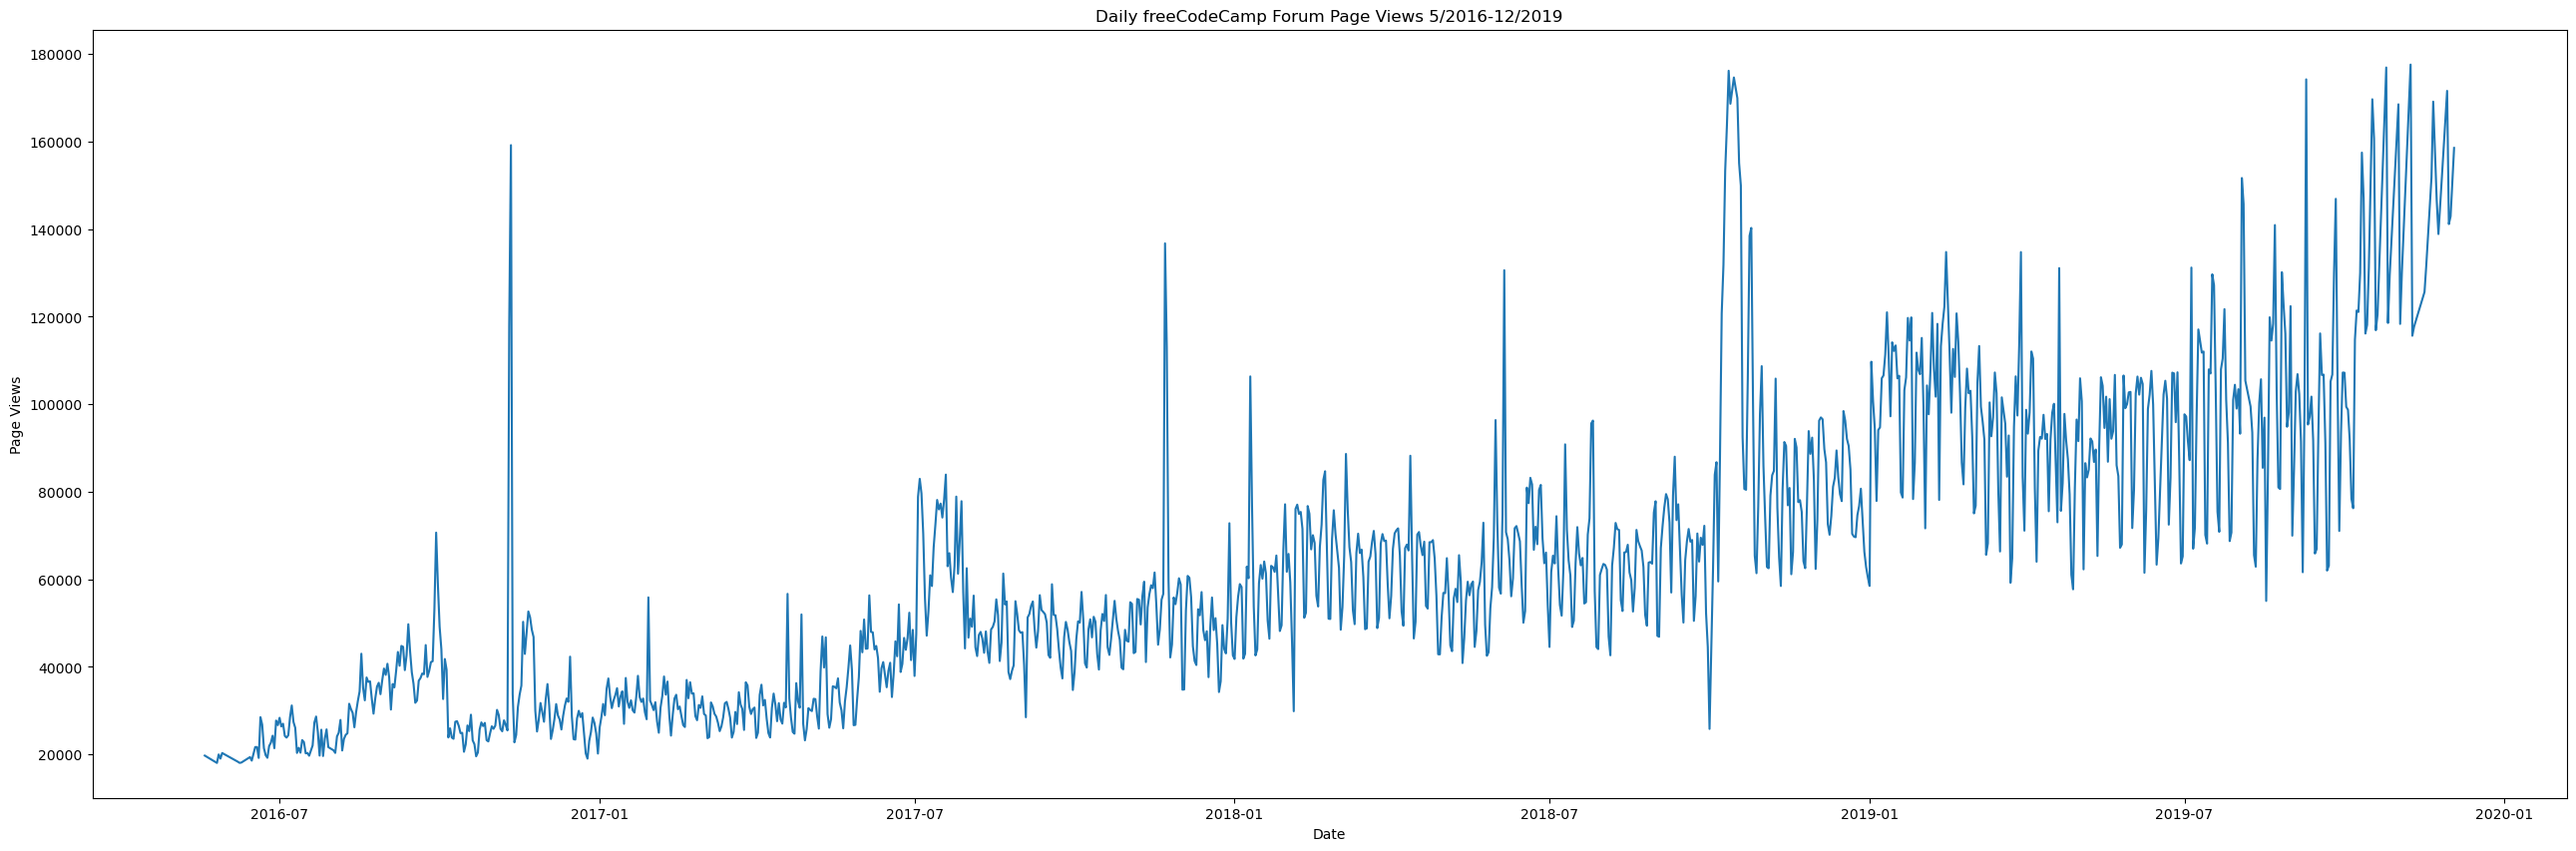

In [105]:
fig, ax = plt.subplots(figsize=(32, 10), dpi=100)
ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
ax.set_xlabel("Date")
ax.set_ylabel("Page Views")
sns.lineplot(data=df, legend=False)

In [106]:
df_bar = df.copy()
df_bar['Year'] = df.index.year
df_bar['Months'] = df.index.month_name()
df_bar

,value,Year,Months
date,,,
2016-05-19,19736,2016,May
2016-05-26,18060,2016,May
2016-05-27,19997,2016,May
2016-05-28,19044,2016,May
2016-05-29,20325,2016,May
...,...,...,...
2019-11-24,138875,2019,November
2019-11-29,171584,2019,November
2019-11-30,141161,2019,November


In [108]:
df_bar = pd.DataFrame(df_bar.groupby(['Year', 'Months'], sort=False).mean().round().astype(int))
df_bar

value
Year Months           
2016 May         19432
     June        21875
     July        24110
     August      31049
     September   41477
     October     27398
     November    40449
     December    27832
2017 January     32785
     February    31113
     March       29369
     April       30879
     May         34244
     June        43578
     July        65807
     August      47712
     September   47377
     October     47439
     November    57702
     December    48421
2018 January     58580
     February    65679
     March       62694
     April       62351
     May         56563
     June        70117
     July        63591
     August      62832
     September   65942
     October    111378
     November    78688
     December    80047
2019 January    102057
     February   105968
     March       91214
     April       89368
     May         91440
     June        90436
     July        97237
     August     102717
     September   97269
     October    122802
     November   143166
     December   150734

In [93]:
df_bar = df_bar.rename(columns={'value': 'Average Page Views'})
df_bar

Average Page Views
Year Months                       
2016 May                     19432
     June                    21875
     July                    24110
     August                  31049
     September               41477
     October                 27398
     November                40449
     December                27832
2017 January                 32785
     February                31113
     March                   29369
     April                   30879
     May                     34244
     June                    43578
     July                    65807
     August                  47712
     September               47377
     October                 47439
     November                57702
     December                48421
2018 January                 58580
     February                65679
     March                   62694
     April                   62351
     May                     56563
     June                    70117
     July                    63591
     August                  62832
     September               65942
     October                111378
     November                78688
     December                80047
2019 January                102057
     February               105968
     March                   91214
     April                   89368
     May                     91440
     June                    90436
     July                    97237
     August                 102717
     September               97269
     October                122802
     November               143166
     December               150734

In [111]:
df_bar.loc[(2016, "December")]

value    27832
Name: (2016, December), dtype: int32

D:\AppData\Local\Temp\ipykernel_16380\169413876.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='center')


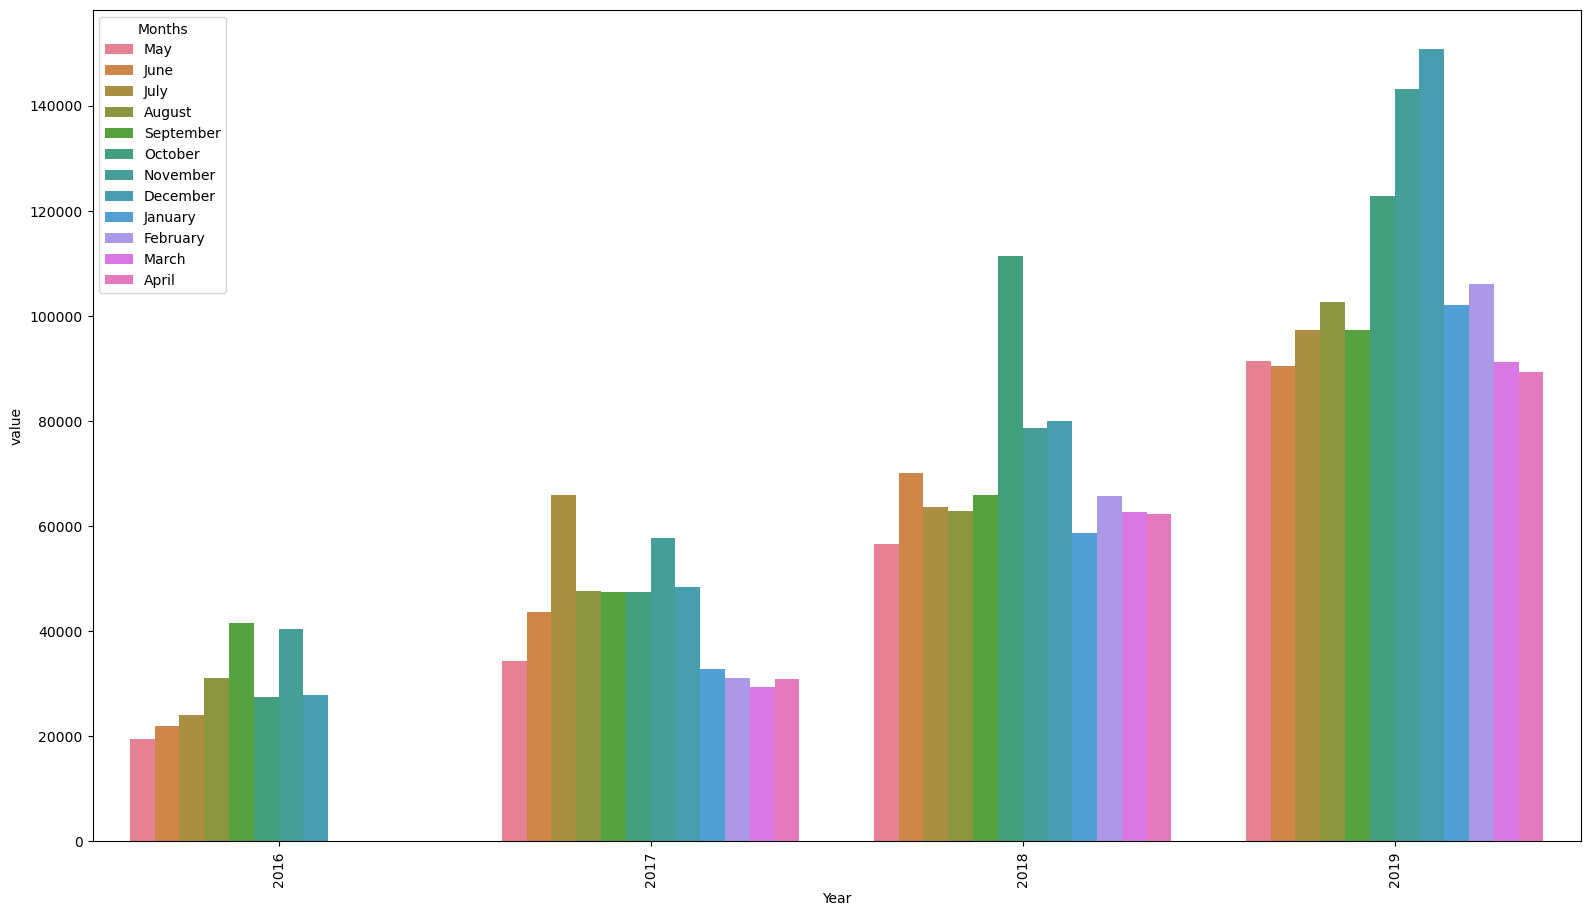

In [121]:
fig, ax = plt.subplots(figsize=(19.2, 10.8), dpi=100)
chart = sns.barplot(data=df_bar, x='Year', y='value', hue='Months')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='center')

ax.set_xlabel = 'Years'
ax.set_ylabel = 'Average Page Views'

<Axes: xlabel='Years', ylabel='Average Page Views'>

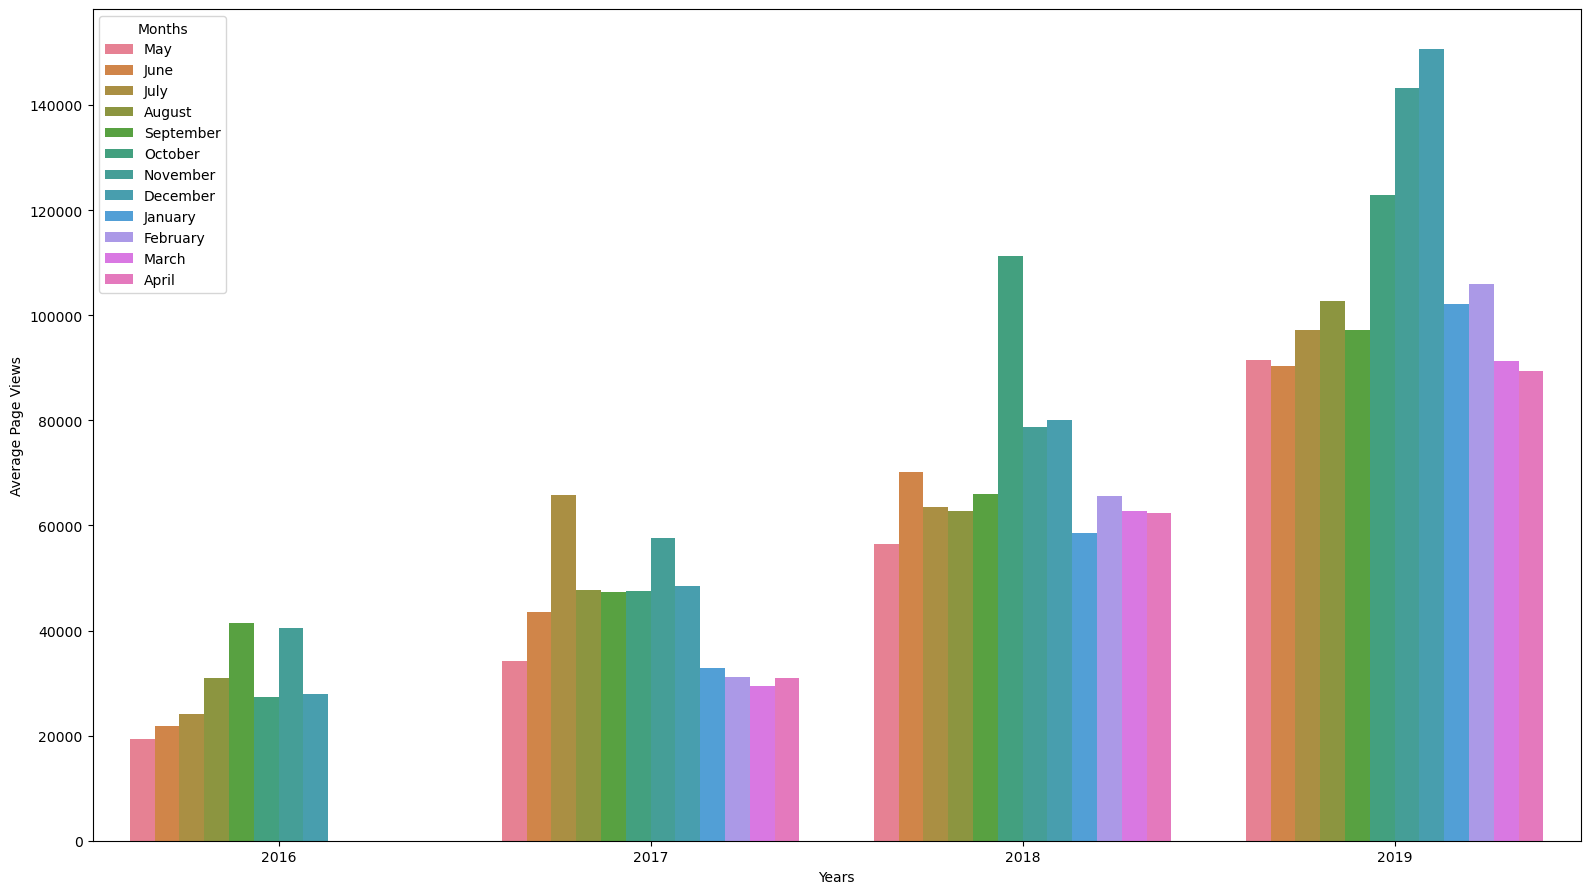

In [122]:
# Copy and modify data for monthly bar plot
df_bar = df.copy()
    
    # Create Year and Month columns
    
df_bar['Years'] = df.index.year
df_bar['Months'] = df.index.month_name()

    # Convert it to have average views of each month grouped by the year

df_bar = pd.DataFrame(df_bar.groupby(['Years', 'Months'], sort=False).mean().round().astype(int))
df_bar = df_bar.rename(columns={"value": "Average Page Views"})

    # Draw bar plot

fig, ax = plt.subplots(figsize=(19.2, 10.8), dpi=100)
sns.barplot(data=df_bar, x='Years', y='Average Page Views', hue='Months')